1. Clone the project repo (https://github.com/PacktPublishing/Data-Science-Solutions-with-Snowflake) and change you working directory to point to it.
2. Install virtualenv `pip install virtualenv`
3. Create a virtual environment in project root directory `virtualenv venv --python=python3.8.x` (Snowpark for Python requires Python 3.8.X)
4. Install Snowflake Connector for Python with Pandas `pip install snowflake-connector-python[pandas]`
5. Install Snowpark for Python with Pandas `pip install snowflake-snowpark-python[pandas]`
6. Install IPYthon `pip install IPYthon`
7. Install Jupyter Notebooks `pip install jupyter`
8. Install Seaborn `pip install seaborn'
9. Install matplotlib `pip install matplotlib`
10. Install Pandas Profiling 'pip install y_data_profiling'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import xlabel
from configparser import ConfigParser
from typing import Optional
from ydata_profiling import ProfileReport
from snowflake.snowpark import Session


In [25]:
# Create a 'config.ini' file to store credentials locally for security
config = ConfigParser()
cfg_path = "../config.ini"
config.read(cfg_path)


['../config.ini']

In [26]:
# Connect to Snowflake
account = config["CONNECTION"]["account"]
user = config["CONNECTION"]["user"]
password = config["CONNECTION"]["password"]
role = config["CONNECTION"]["role"]
warehouse = config["CONNECTION"]["warehouse"]
database = config["CONNECTION"]["database"]
schema = config["CONNECTION"]["schema"]

connection_parameters = {
    "account": account,
    "user": user,
    "password": password,
    "role": role,
    "warehouse": warehouse,
    "database": database,
    "schema": schema,
}

session = Session.builder.configs(connection_parameters).create()

# Test connection
print(session.sql("select * from global_superstore_orders limit 5").collect())


[Row(ROW_ID=40098, ORDER_ID='CA-2014-AB10015140-41954', ORDER_DATE=datetime.date(2014, 11, 11), SHIP_DATE=datetime.date(2014, 11, 13), SHIP_MODE='First Class', CUSTOMER_ID='AB-100151402', CUSTOMER_NAME='Aaron Bergman', SEGMENT='Consumer', POSTAL_CODE='73120', CITY='Oklahoma City', STATE='Oklahoma', COUNTRY='United States', REGION='Central US', MARKET='USCA', PRODUCT_ID='TEC-PH-5816', CATEGORY='Technology', SUBCATEGORY='Phones', PRODUCT_NAME='Samsung Convoy 3', SALES=Decimal('221.98'), QUANTITY=2, DISCOUNT=Decimal('0.00'), PROFIT=Decimal('62.15'), SHIPPING_COST=Decimal('40.77'), ORDER_PRIORITY='High'), Row(ROW_ID=26341, ORDER_ID='IN-2014-JR162107-41675', ORDER_DATE=datetime.date(2014, 2, 5), SHIP_DATE=datetime.date(2014, 2, 7), SHIP_MODE='Second Class', CUSTOMER_ID='JR-162107', CUSTOMER_NAME='Justin Ritter', SEGMENT='Corporate', POSTAL_CODE=None, CITY='Wollongong', STATE='New South Wales', COUNTRY='Australia', REGION='Oceania', MARKET='Asia Pacific', PRODUCT_ID='FUR-CH-5379', CATEGORY='

In [27]:
# Load data tables locally as Snowflake tables
orders_raw = session.table("GLOBAL_SUPERSTORE_ORDERS")
returns_raw = session.table("GLOBAL_SUPERSTORE_RETURNS")

# Print an example of the orders_raw dataframe in Pandas format
orders_raw.limit(5).toPandas()


ROW_ID                  ORDER_ID  ORDER_DATE   SHIP_DATE     SHIP_MODE  \
0   40098  CA-2014-AB10015140-41954  2014-11-11  2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675  2014-02-05  2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929  2014-10-17  2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667  2014-01-28  2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948  2014-11-05  2014-11-06      Same Day   

    CUSTOMER_ID     CUSTOMER_NAME      SEGMENT POSTAL_CODE           CITY  \
0  AB-100151402     Aaron Bergman     Consumer       73120  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate        None     Wollongong   
2     CR-127307      Craig Reiter     Consumer        None       Brisbane   
3    KM-1637548  Katherine Murray  Home Office        None         Berlin   
4    RH-9495111       Rick Hansen     Consumer        None          Dakar   

   ...   PRODUCT_ID    CATEGORY SUBCATEGORY  \
0  ...  TEC-PH-5816  Technology      Phones   
1  ...  FUR-CH-5379   Furniture      Chairs   
2  ...  TEC-PH-5356  Technology      Phones   
3  ...  TEC-PH-5267  Technology      Phones   
4  ...  TEC-CO-6011  Technology     Copiers   

                                PRODUCT_NAME    SALES QUANTITY DISCOUNT  \
0                           Samsung Convoy 3   221.98        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.40        9      0.1   
2          Nokia Smart Phone, with Caller ID  5175.17        9      0.1   
3             Motorola Smart Phone, Cordless  2892.51        5      0.1   
4             Sharp Wireless Fax, High-Speed  2832.96        8      0.0   

   PROFIT  SHIPPING_COST  ORDER_PRIORITY  
0   62.15          40.77            High  
1 -288.77         923.63        Critical  
2  919.97         915.49          Medium  
3  -96.54         910.16          Medium  
4  311.52         903.04        Critical  

[5 rows x 24 columns]

In [28]:
# Join tables orders_raw and returns_raw on order_id (uses Snowflake's join syntax)
orders_join = orders_raw.join(returns_raw, "ORDER_ID")

# Convert to Pandas DataFrame (Snowpark has data manipulation limitations)
orders_pandas = orders_join.toPandas()
orders_pandas.pop(orders_pandas.columns[-1])  # Remove last column


0        Eastern Asia
1        Eastern Asia
2             Oceania
3         Southern US
4             Oceania
            ...      
2215    South America
2216     Eastern Asia
2217       Central US
2218     North Africa
2219    Southern Asia
Name: r_rzsq_REGION, Length: 2220, dtype: object

In [22]:
# Generate the report
ProfileReport(orders_pandas)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\mldev\Data-Science-Solutions-with-Snowflake\venv\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\mldev\Data-Science-Solutions-with-Snowflake\venv\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\mldev\Data-Science-Solutions-with-Snowflake\venv\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\mldev\Data-Science-Solutions-with-Snowflake\venv\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
c:\mldev\Data-Science-Solutions-with-Snowflake\venv\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\mldev\Data-Science-Solutions-with-Snowflake\venv\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteri


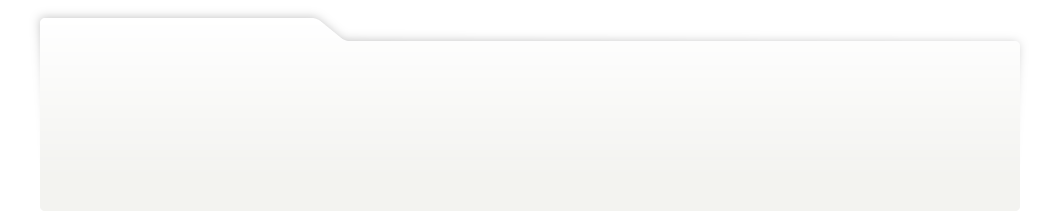
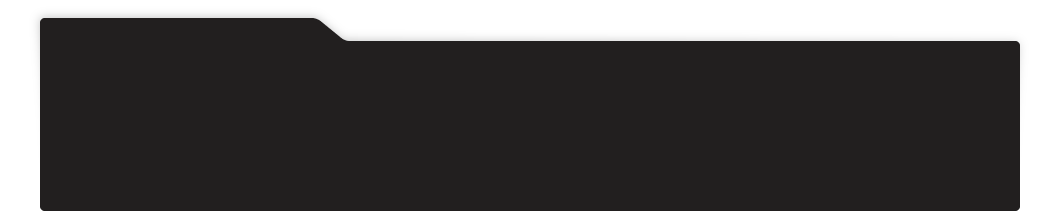
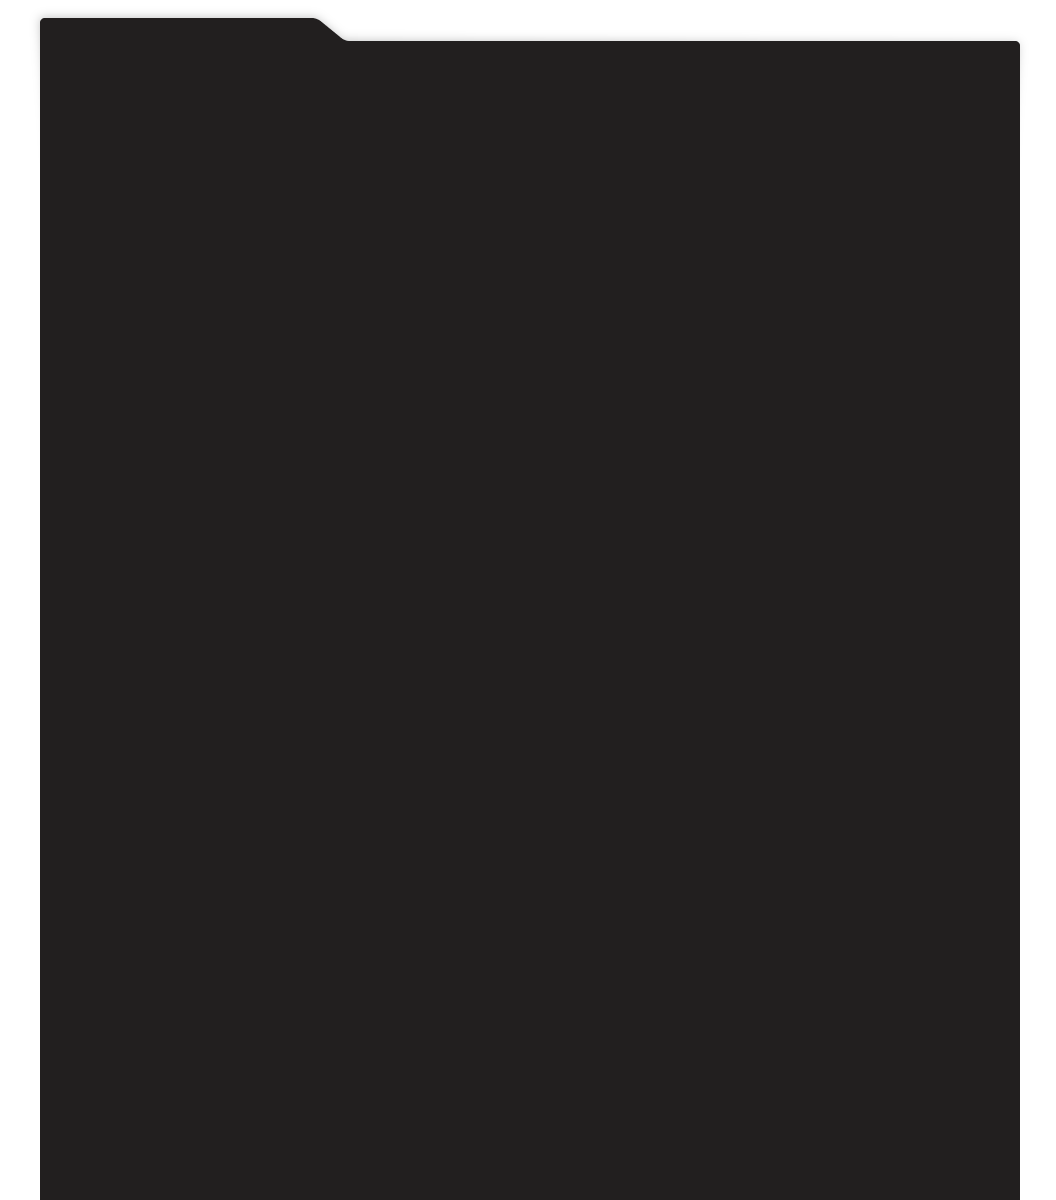
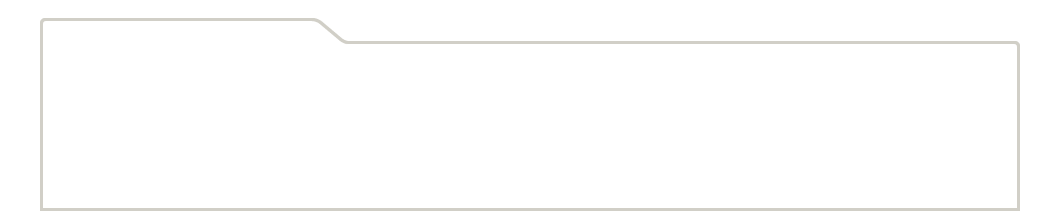
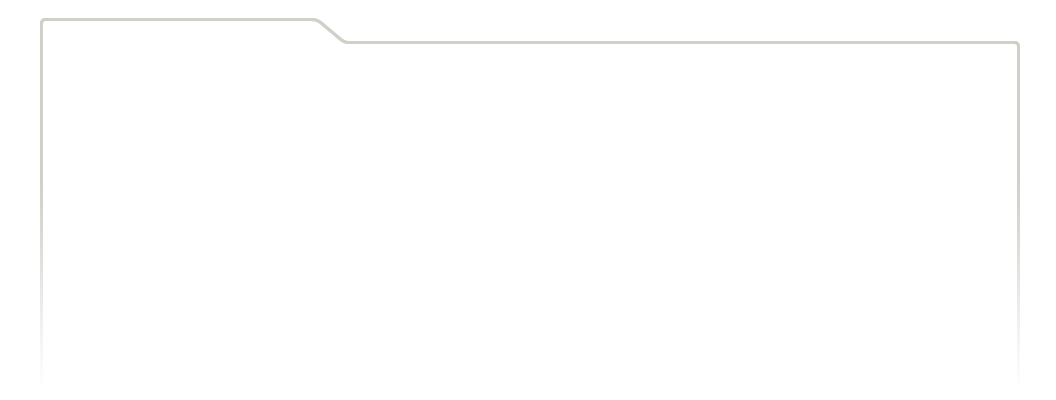
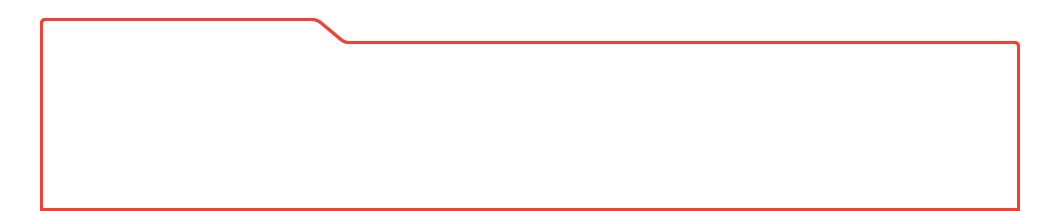
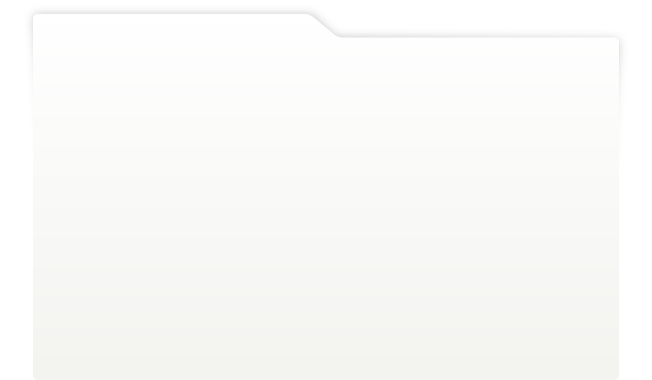
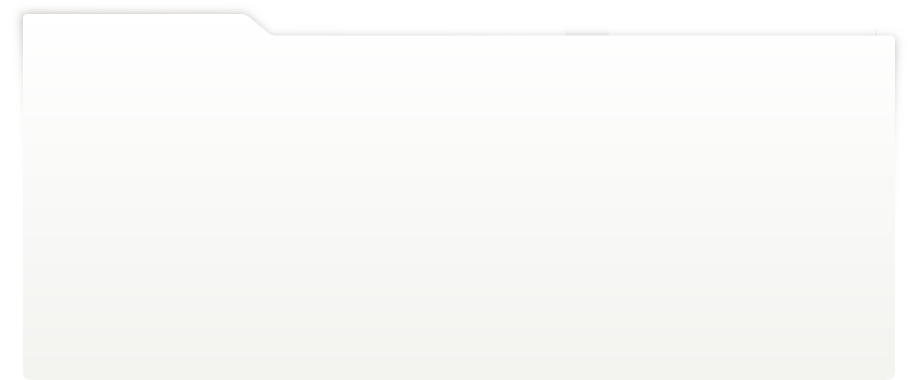
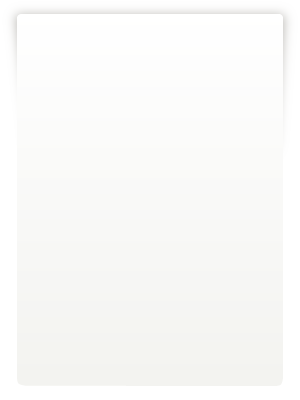
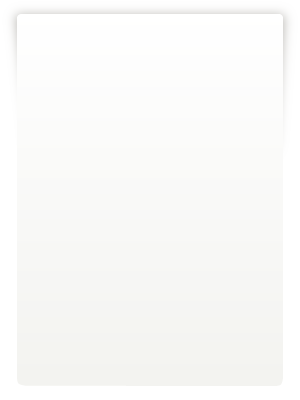
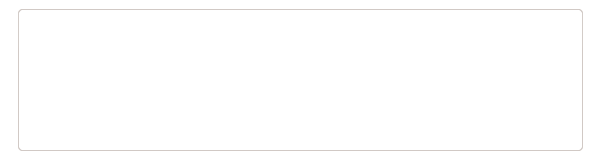
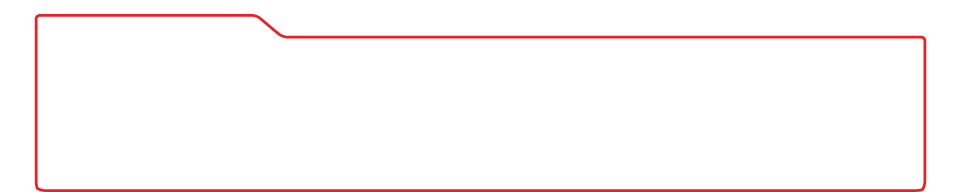
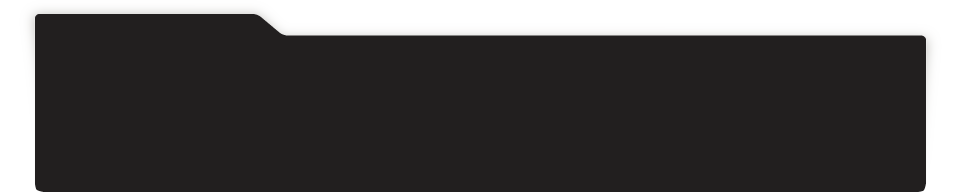
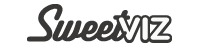
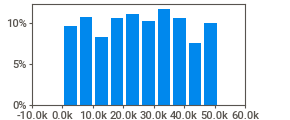
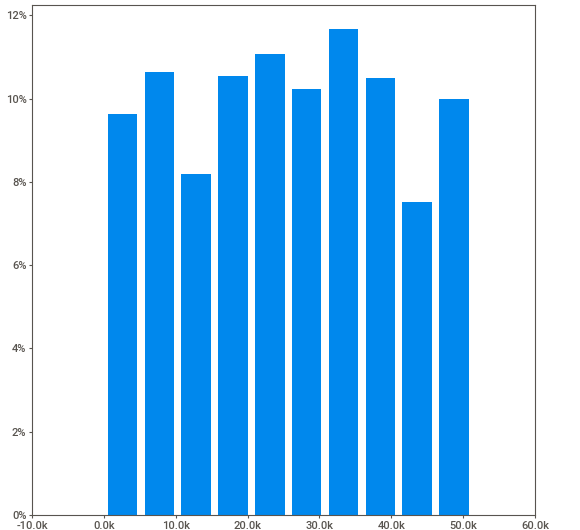
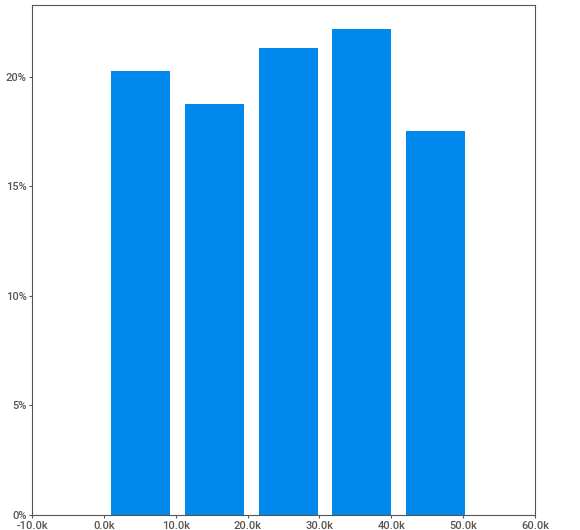
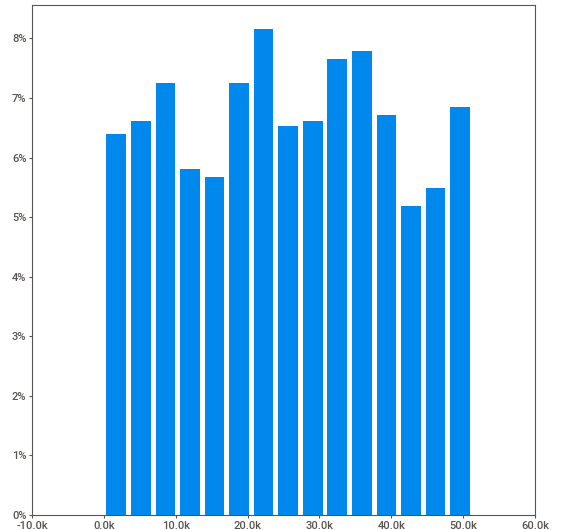
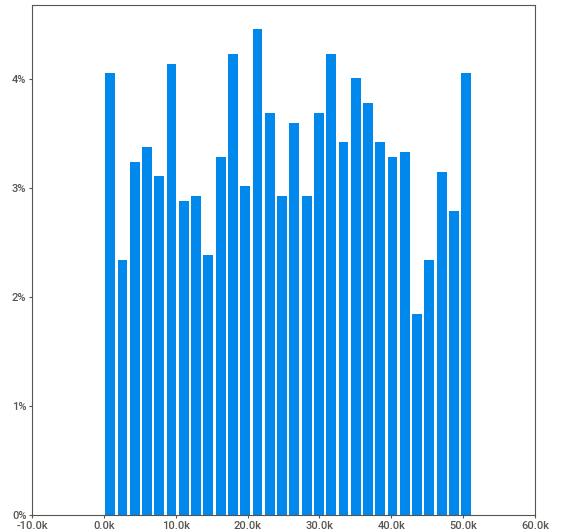
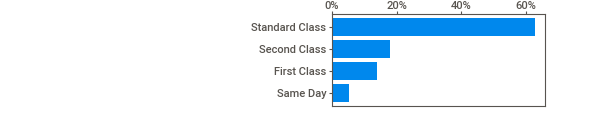
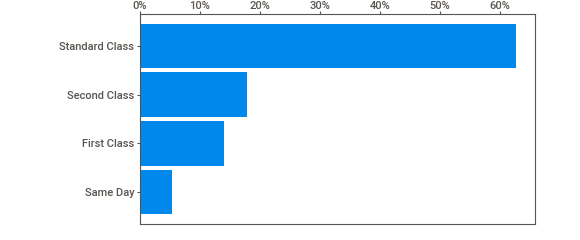
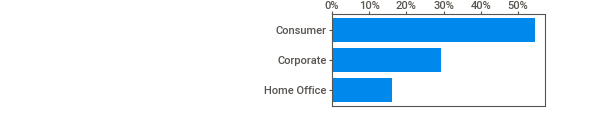
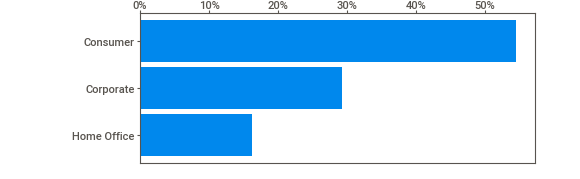
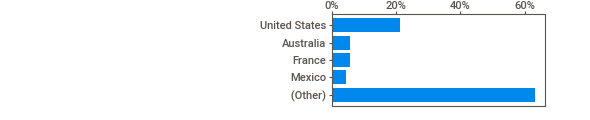
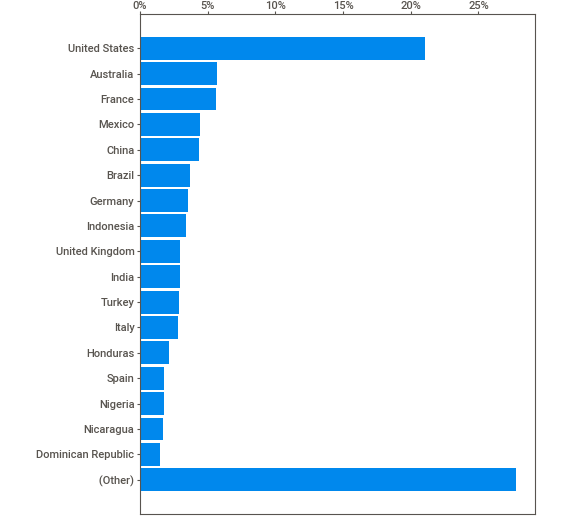
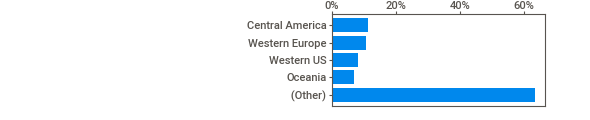
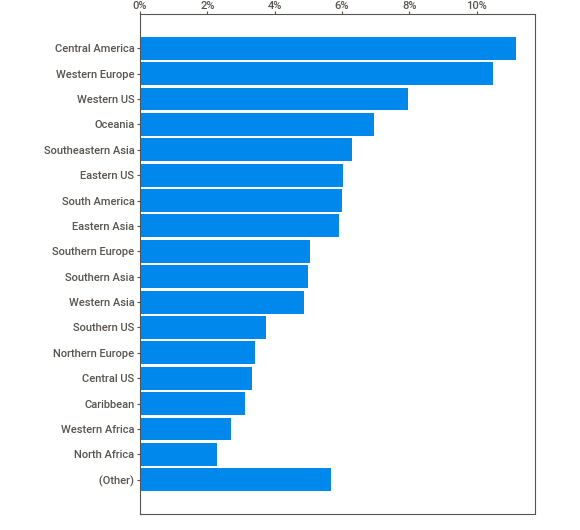
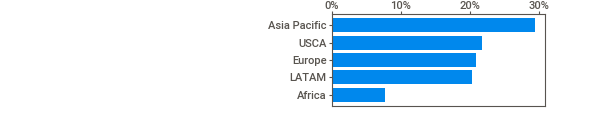
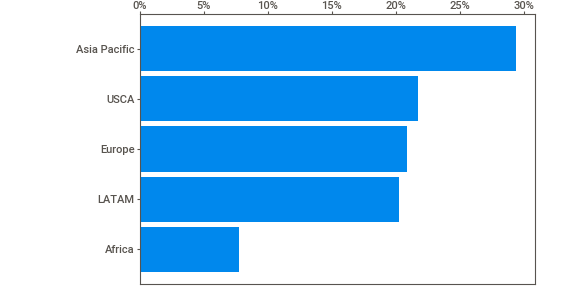
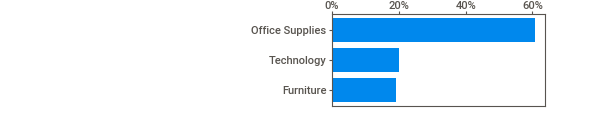
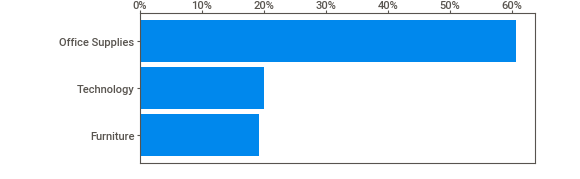
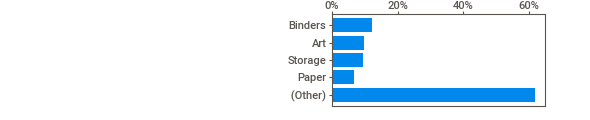
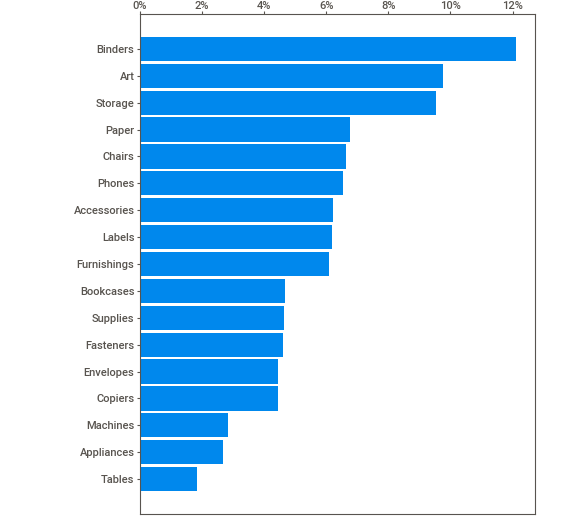
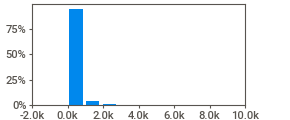
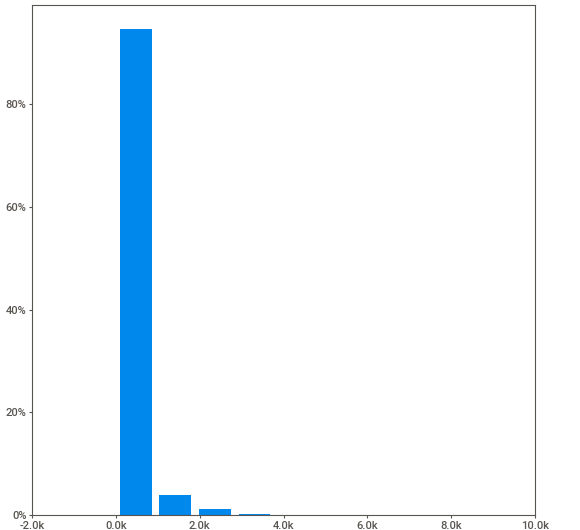
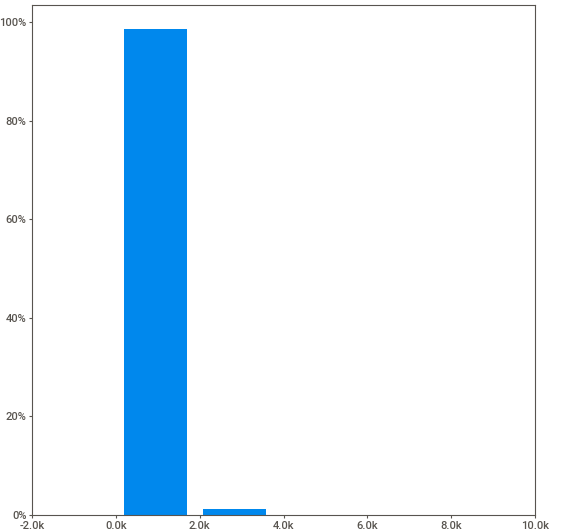
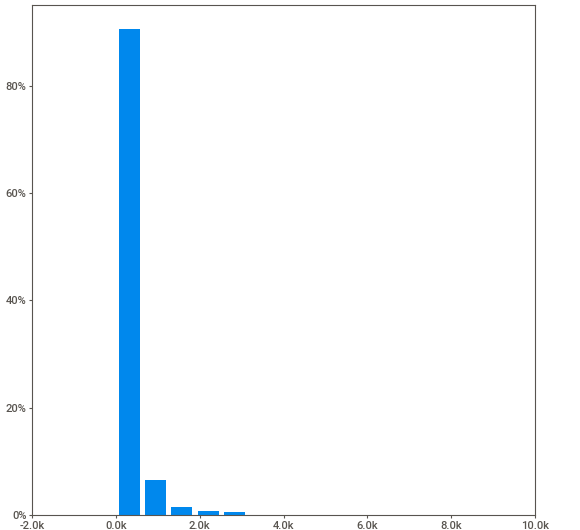
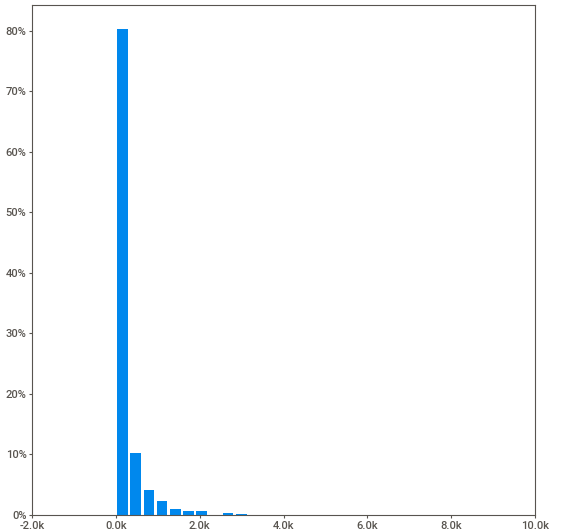
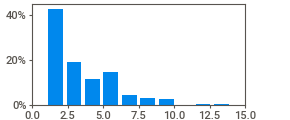
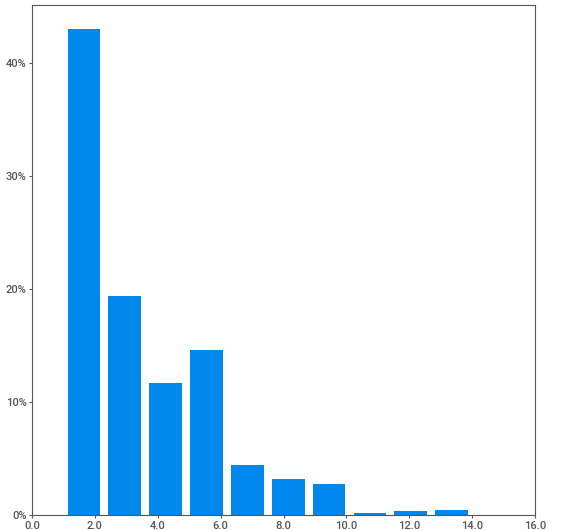
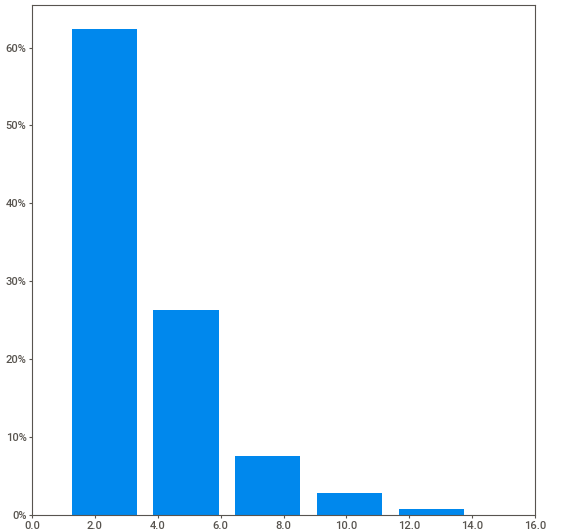
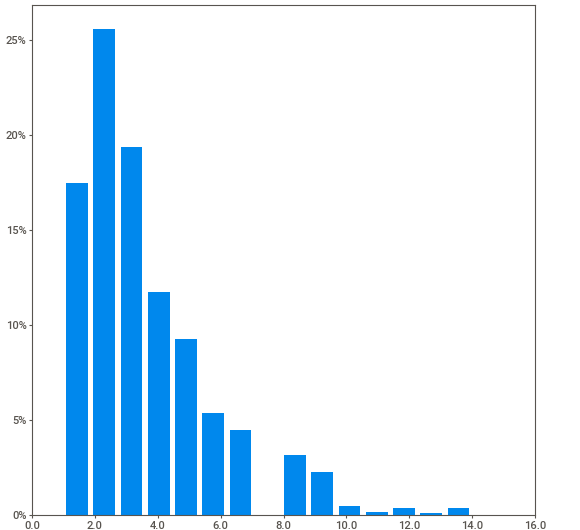
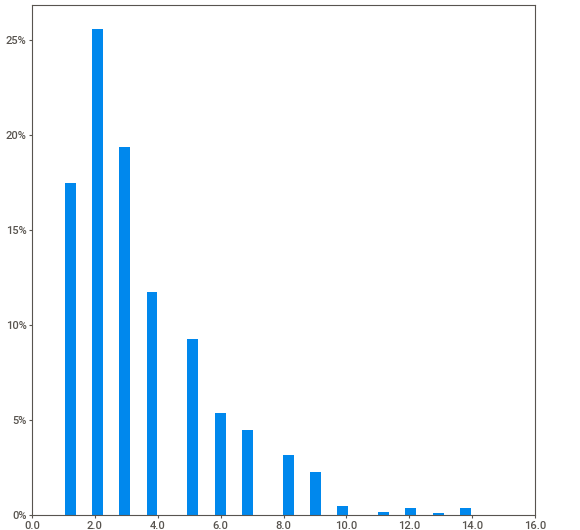
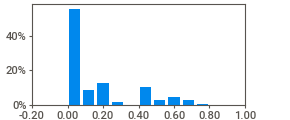
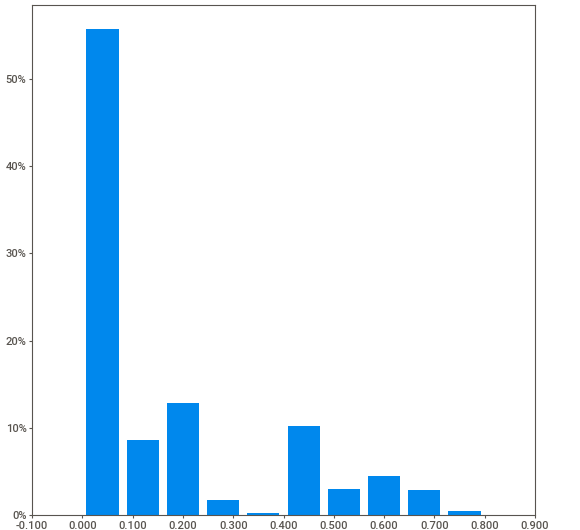
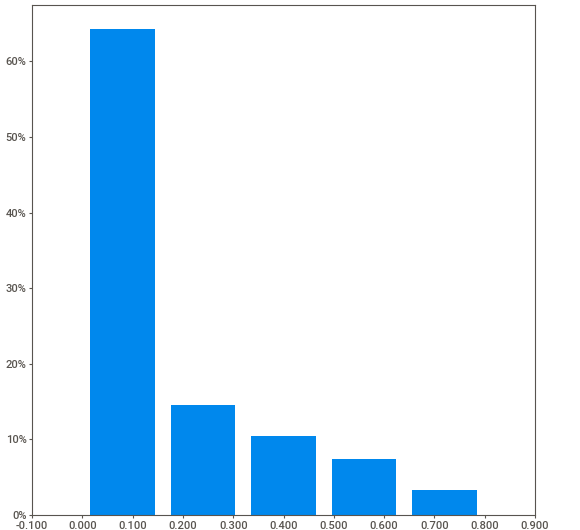
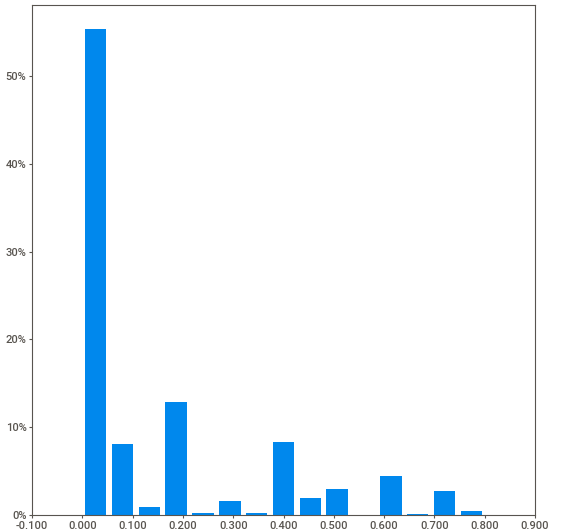
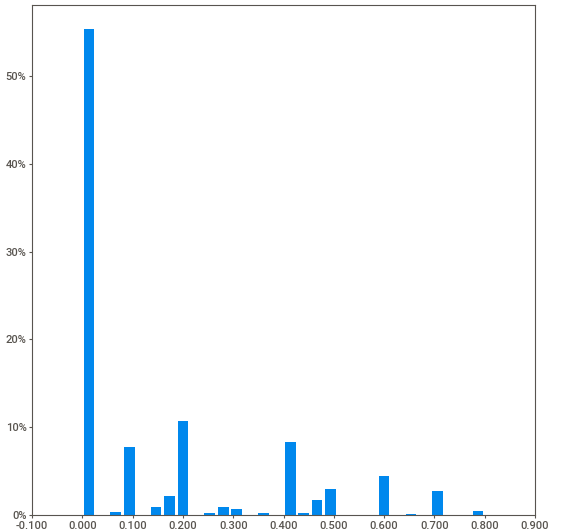
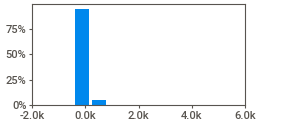
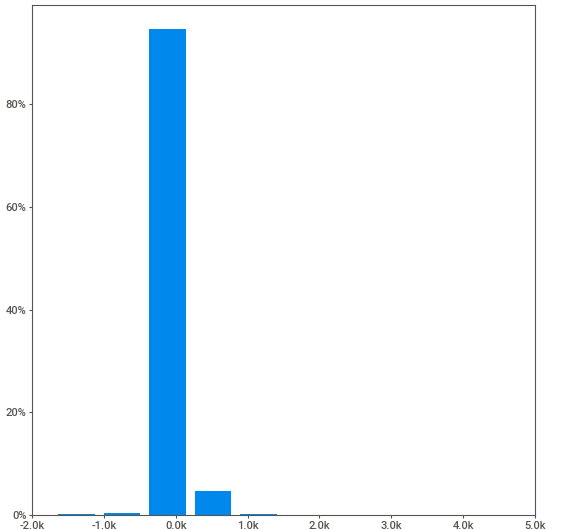
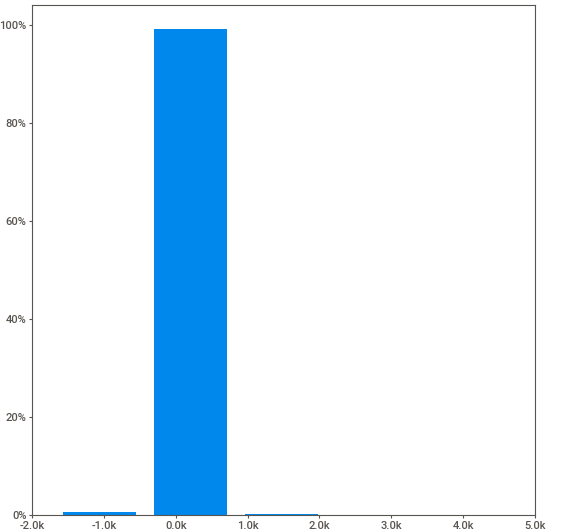
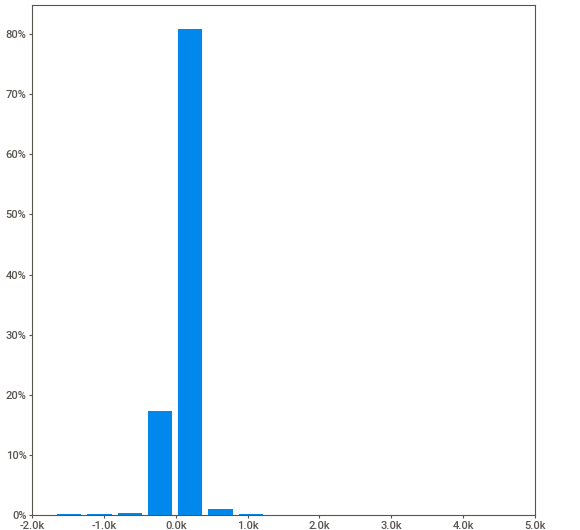
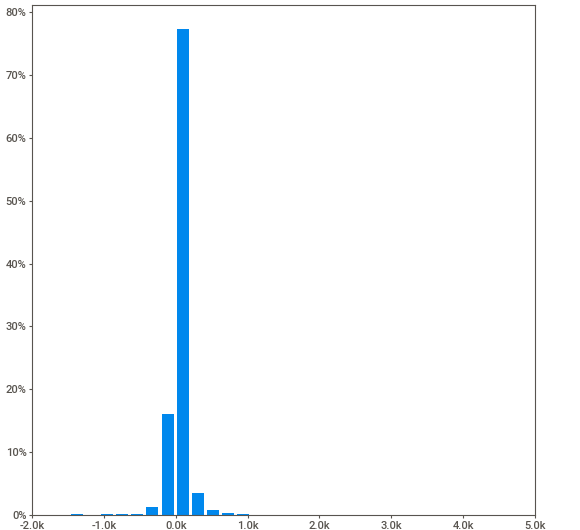
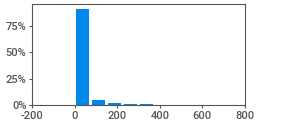
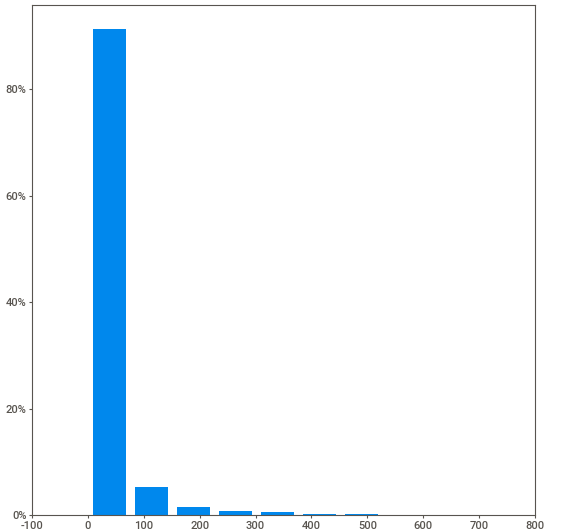
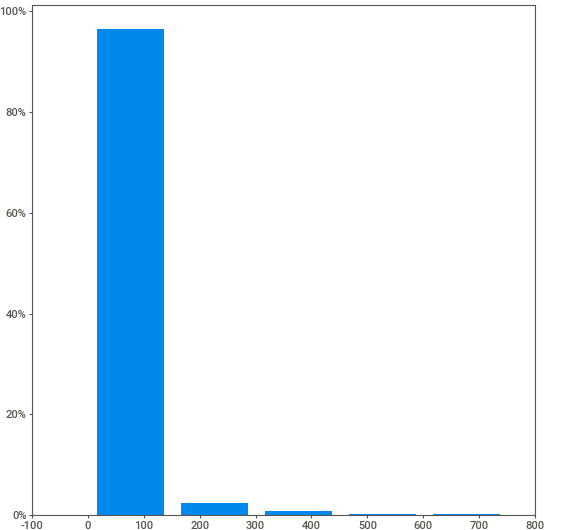
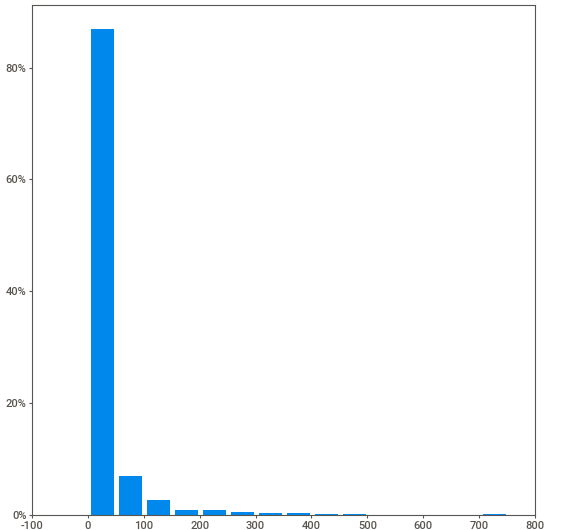
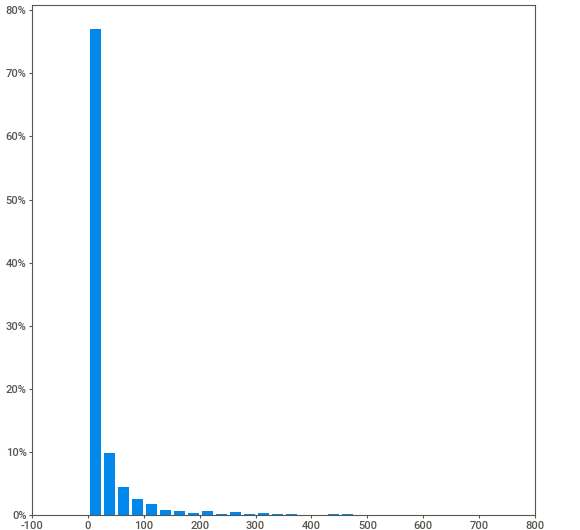
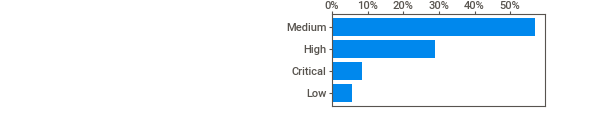
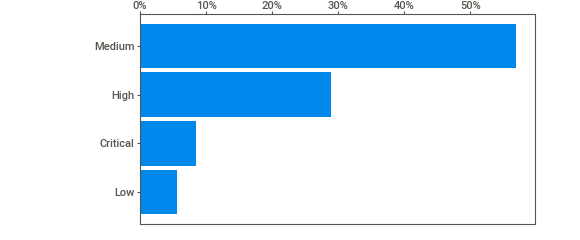
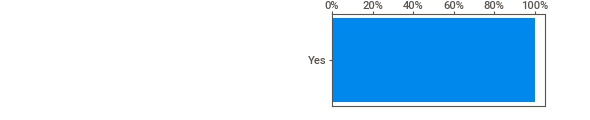
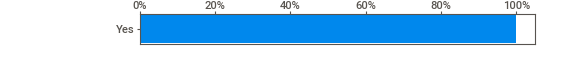
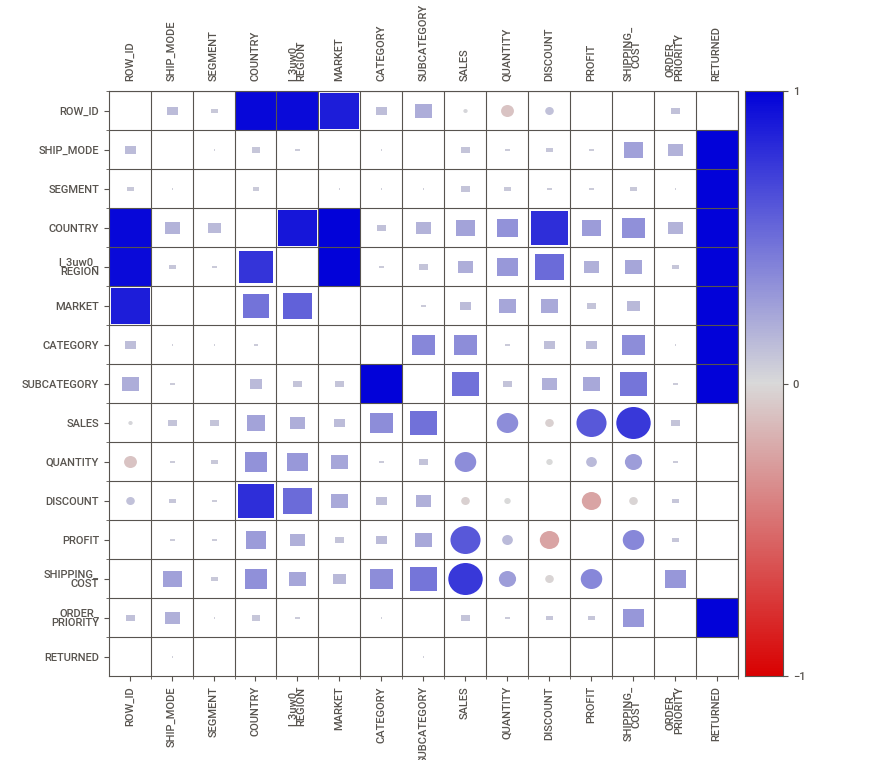
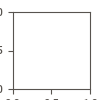

In [35]:
import sweetviz as sv

sv.analyze(orders_pandas).show_notebook()


In [ ]:
def write_to_snowflake(df: pd.DataFrame, table_name: str) -> None:
    """
    Write Pandas DataFrame to Snowflake table
    """
    session.write_pandas(df, table_name, auto_create_table=True)


write_to_snowflake(movie_dq, "MOVIE_BASE")


In [32]:
orders_pandas.columns


Index(['ORDER_ID', 'ROW_ID', 'ORDER_DATE', 'SHIP_DATE', 'SHIP_MODE',
       'CUSTOMER_ID', 'CUSTOMER_NAME', 'SEGMENT', 'POSTAL_CODE', 'CITY',
       'STATE', 'COUNTRY', 'l_3uw0_REGION', 'MARKET', 'PRODUCT_ID', 'CATEGORY',
       'SUBCATEGORY', 'PRODUCT_NAME', 'SALES', 'QUANTITY', 'DISCOUNT',
       'PROFIT', 'SHIPPING_COST', 'ORDER_PRIORITY', 'RETURNED'],
      dtype='object')